#**K-Mediods Clustering**
In the previous step we outlined how the kmeans algorithm is the most commonly used clustering algorithm. We also outlined how it has a number of drawbacks related to outliers and the size of dataset for example. K-mediods is a clustering algorithm that uses partitoning to to create clusters. Unlike the K-means algorithm which attempts to minmize the total squared error the K-mediods choose datapoints as centers. K-medoids is also a partitioning technique of clustering that clusters the data set of n objects into k clusters with k known a priori. Its more robust to outliers than the K-means algorithm an uses the mediod as oppossed to the average of a cluster to determine centrality.  

The most common realisation of k-medoid clustering is the Partitioning Around Medoids (PAM) algorithm and is as follows:

>* Initialize: randomly select k of the n data points as the medoids
>* Assignment step: Associate each data point to the closest medoid.
>* Update step: For each medoid m and each data point o associated to m swap m and o and compute the total cost of the configuration (that is, the average dissimilarity of o to all the data points associated to m). Select the medoid o with the lowest cost of the configuration.
Repeat alternating steps 2 and 3 until there is no change in the assignments.

PAM works well for small datasets and deals with outliers well but has many of the other problems that K-means has. There are other alternatives such as [CLARA](https://codedocs.xyz/annoviko/pyclustering/namespacepyclustering.html) (Clustering Large Applications) algorithm which select random observations from the dataset and performs Partitioning Around Medoids (PAM) algorithm on them.


The following code implements the K-mediods algorithm. As usual play with code and try it out on a dataset of your chosing. Put your thoughts on the comments board.





You will have to run the following code as you will have to install sklearn_extra.

In [1]:
!pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip

     - 740.3 kB 18.9 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0.dev0-cp311-cp311-linux_x86_64.whl size=2122719 sha256=fde094c48080225ec04f2b0fb2560b0b774ff79b690f4ac416e33bc6d1db47ce
  Stored in directory: /tmp/pip-ephem-wheel-cache-td37y97j/wheels/60/45/f4/bd3bd38771716bf0f9b870e21bc5a227c811819dfa0a539679
Successfully built scikit-learn-extra


As usual we import the relevant python libraries.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from mpl_toolkits.mplot3d import Axes3D

Next we import the Iris data from sklearn.datasets. I have printed out the feature names so I could label the 3-d plot. I have also printed out the correlation matrix and as in previous examples see that petal length and petal width are highly correlated, 96%. Sepal length is also highly correlated with these feature (81.7%).

In [3]:
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.

y = iris.target
target_names=list(iris.target_names)
print(target_names)
df = pd.DataFrame({'Xsl':X[:,0],'Xsw':X[:,1],'Xpl':X[:,3],'Xpw':X[:,3],'y':y})
print(df)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


['setosa', 'versicolor', 'virginica']
     Xsl  Xsw  Xpl  Xpw  y
0    5.1  3.5  0.2  0.2  0
1    4.9  3.0  0.2  0.2  0
2    4.7  3.2  0.2  0.2  0
3    4.6  3.1  0.2  0.2  0
4    5.0  3.6  0.2  0.2  0
..   ...  ...  ...  ... ..
145  6.7  3.0  2.3  2.3  2
146  6.3  2.5  1.9  1.9  2
147  6.5  3.0  2.0  2.0  2
148  6.2  3.4  2.3  2.3  2
149  5.9  3.0  1.8  1.8  2

[150 rows x 5 columns]


,Xsl,Xsw,Xpl,Xpw,y
Xsl,1.000000,-0.117570,0.817941,0.817941,0.782561
Xsw,-0.117570,1.000000,-0.366126,-0.366126,-0.426658
Xpl,0.817941,-0.366126,1.000000,1.000000,0.956547
Xpw,0.817941,-0.366126,1.000000,1.000000,0.956547
y,0.782561,-0.426658,0.956547,0.956547,1.000000


The next thing we will do is create a plot showing the various flower types and how there sepal length and sepal widths relate to each other.

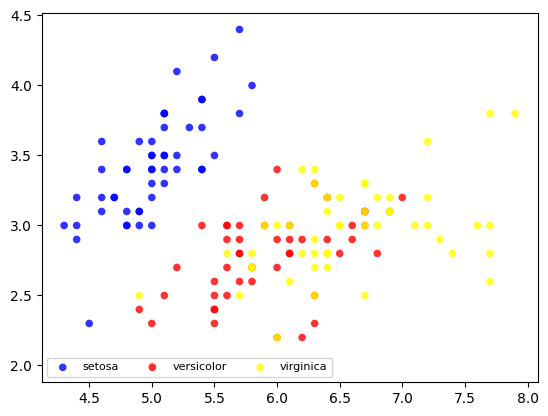

In [4]:
#X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
groups=("1","2","3")
fig, ax = plt.subplots()

setosa=plt.scatter(df.loc[df['y']==0,'Xsl'].values, df.loc[df['y']==0,'Xsw'].values,alpha=0.8, c='blue', edgecolors='none', s=30)
versicolor=plt.scatter(df.loc[df['y']==1,'Xsl'].values, df.loc[df['y']==1,'Xsw'].values,alpha=0.8, c='red', edgecolors='none', s=30)
virginica=plt.scatter(df.loc[df['y']==2,'Xsl'].values, df.loc[df['y']==2,'Xsw'].values,alpha=0.8, c='yellow', edgecolors='none', s=30)

plt.legend((setosa, versicolor, virginica),
           ('setosa', 'versicolor', 'virginica'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

We will now implement the K-Mediods and can see that it out performs the kmeans algorithm from the previous step. Have a look at the code below and note that there is an option to specify the metric that you are going to use for the distance measure. The default option is the euclidean distance.

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1
 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 2 1
 1 1 2 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


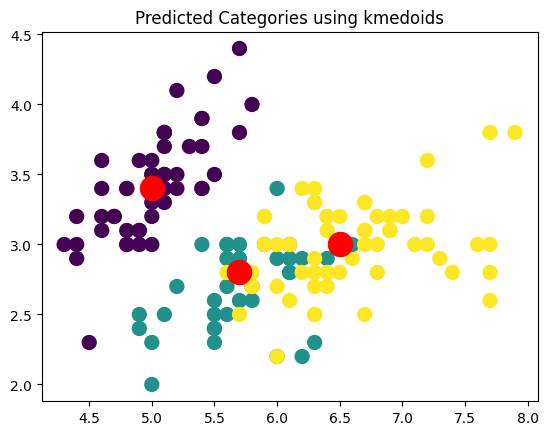

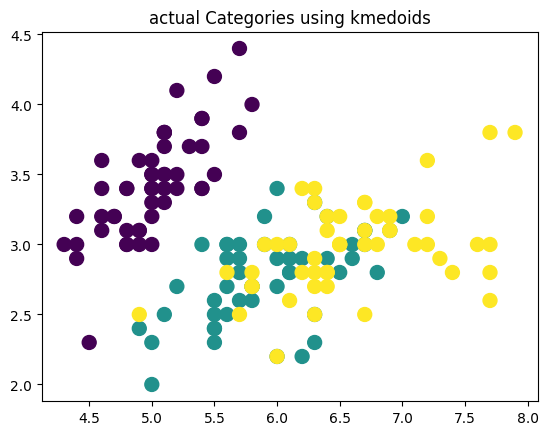

In [5]:
#KMedoids
kmedoids = KMedoids(n_clusters=3, random_state=0,).fit(X)
pred_y = kmedoids.predict(X)
print(pred_y)
pred_y = np.where(pred_y == 2,3 , pred_y)
pred_y = np.where(pred_y == 1,4 , pred_y)
pred_y = np.where(pred_y == 0,5 , pred_y)
pred_y=pred_y-3
print(pred_y)
print(y)
plt.scatter(X[:,0], X[:,1],s=100, c=pred_y)
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s=300, c='red')
plt.title('Predicted Categories using kmedoids')
plt.show()
plt.title('actual Categories using kmedoids')
plt.scatter(X[:,0], X[:,1],s=100, c=y)
plt.show()

Finally, we have printed out the confusion matrix.
Play with the above code and see if you can get it to work on another dataset. As usual leave your thought on the comments board.

In [6]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, pred_y)

array([[50,  0,  0],
       [ 0, 37, 13],
       [ 0,  1, 49]])